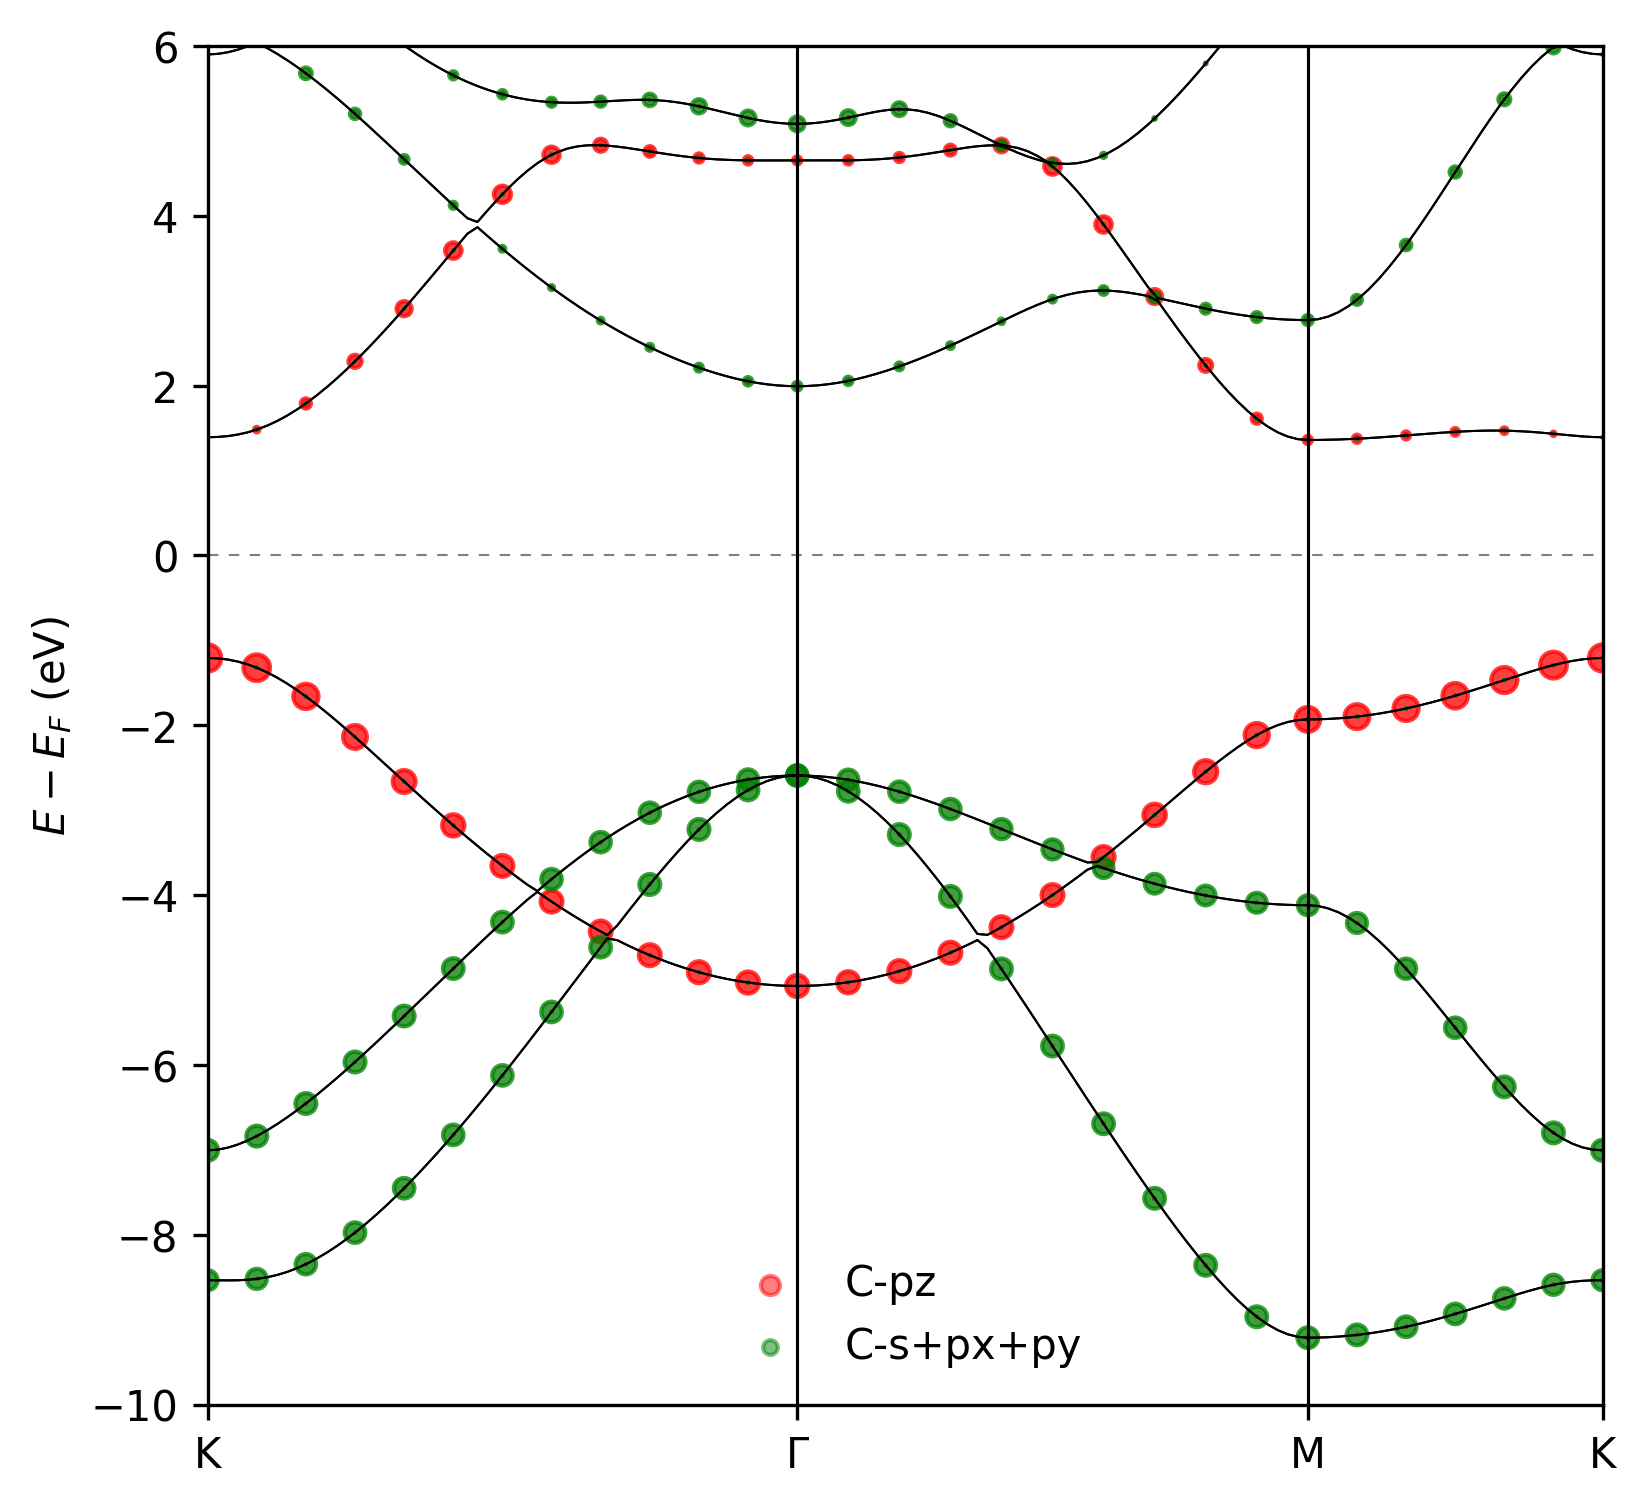

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

plt.rcParams["figure.dpi"]=300
plt.rcParams["figure.facecolor"]="white"
plt.figure(figsize = (6, 6))

data = np.loadtxt('../src/SiC/sic_primitive.BANDDAT1')
bndstart = np.where(data[:, 0] == 0.0)[0][0]
databnd = data[bndstart:-1, :]
symlines = data[0:bndstart, 0]
symlines = np.unique(symlines)
bnd = []

for row in range(len(databnd)-1):
    if (np.array_equal(databnd[row, :], databnd[row+1, :]) == False):
        bnd.append(databnd[row, :])
bnd.append(databnd[-2, :])
bnd.append(databnd[-1, :])
bnd = np.array(bnd)

k = np.unique(bnd[:, 0])  # k values 
nbnd = int(len(bnd)/len(k))  # no of bands

bands = np.zeros([len(k), nbnd])

for i in range(len(bnd)):
    k_index = i % len(k)
    band_index = int(i/len(k))
    bands[k_index, band_index] = bnd[i][1]

for i in range(nbnd):
    plt.plot(k, bands[:, i], linewidth=0.5, alpha=1, color='k')

for i in symlines:
    plt.axvline(x=i, linewidth=0.75, color='k', alpha=1)

proj = np.loadtxt("../src/SiC/sic_primitive.unfold_orb")
plt.scatter(proj[:, 0], proj[:, 1], s= proj[:, 6]*50, c='r', alpha=0.5, label="C-pz")
plt.scatter(proj[:, 0], proj[:, 1], s=(proj[:, 2] + proj[:, 3] + proj[:, 4] + proj[:, 5])*50, \
            c= 'g', alpha=0.5, label="C-s+px+py")
plt.xlim(k[0], k[-1])
plt.ylim(-10, 6)
plt.xticks(ticks= [k[0], symlines[0], symlines[1], k[-1]], labels=['K', '$\Gamma$', 'M', 'K'])
plt.ylabel("$E - E_F$ (eV)")
plt.axhline(linewidth=0.5, color='k', alpha=0.5, linestyle=(0, (5, 5)))
plt.legend(frameon=False)
plt.show()